In [61]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from IPython.display import display_markdown

In [62]:
dados = pd.read_csv('.\\..\\..\\Dataset\\testes\\casos_mensais_total.csv')

In [63]:
dados

,dt_notificacao,casos
0,2013-12-01,317
1,2014-01-01,8622
2,2014-02-01,19518
3,2014-03-01,46080
4,2014-04-01,125274
...,...,...
125,2024-05-01,561542
126,2024-06-01,184599
127,2024-07-01,57370
128,2024-08-01,29892


In [64]:
anos = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
dados_ano = {}

for ano in anos:

    dados_ano[ano] = pd.DataFrame(
                        dados \
                        .where(
                              (dados['dt_notificacao'] >= f'{ano}-01-01')
                            & (dados['dt_notificacao'] <= f'{ano}-12-01')
                        )
                    ) \
                    .dropna(subset=["dt_notificacao"])

#data['Time'] = np.arange(len(data.index))

In [65]:
anos.append('TOTAL')

dados_ano['TOTAL'] = dados

### 2014

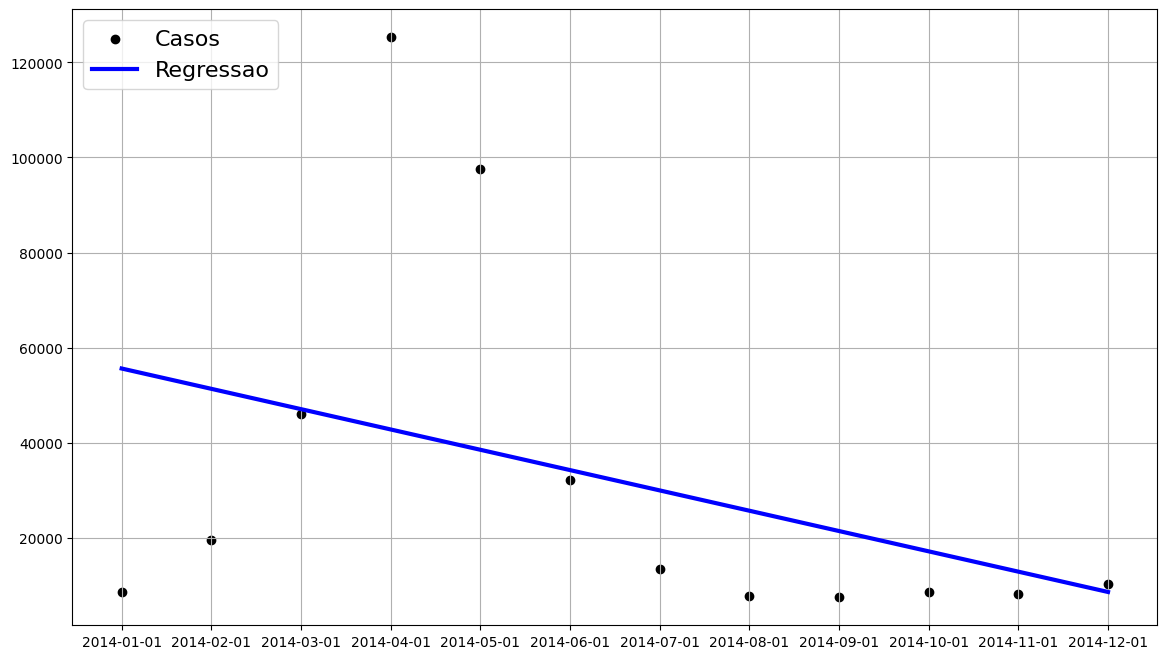

### 2015

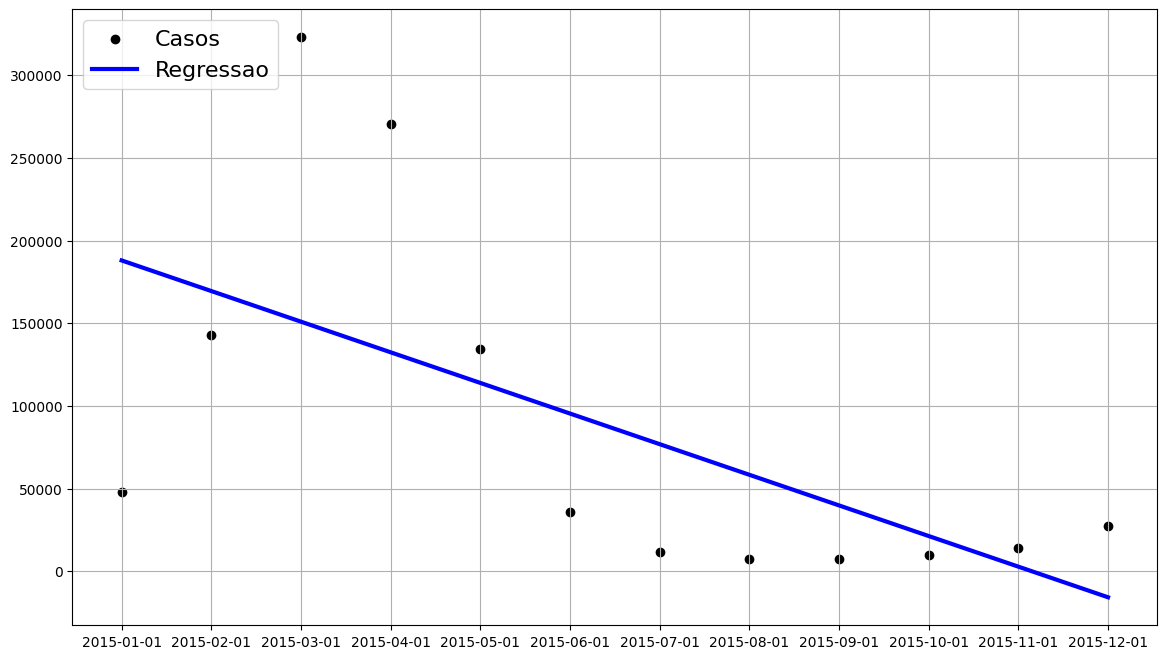

### 2016

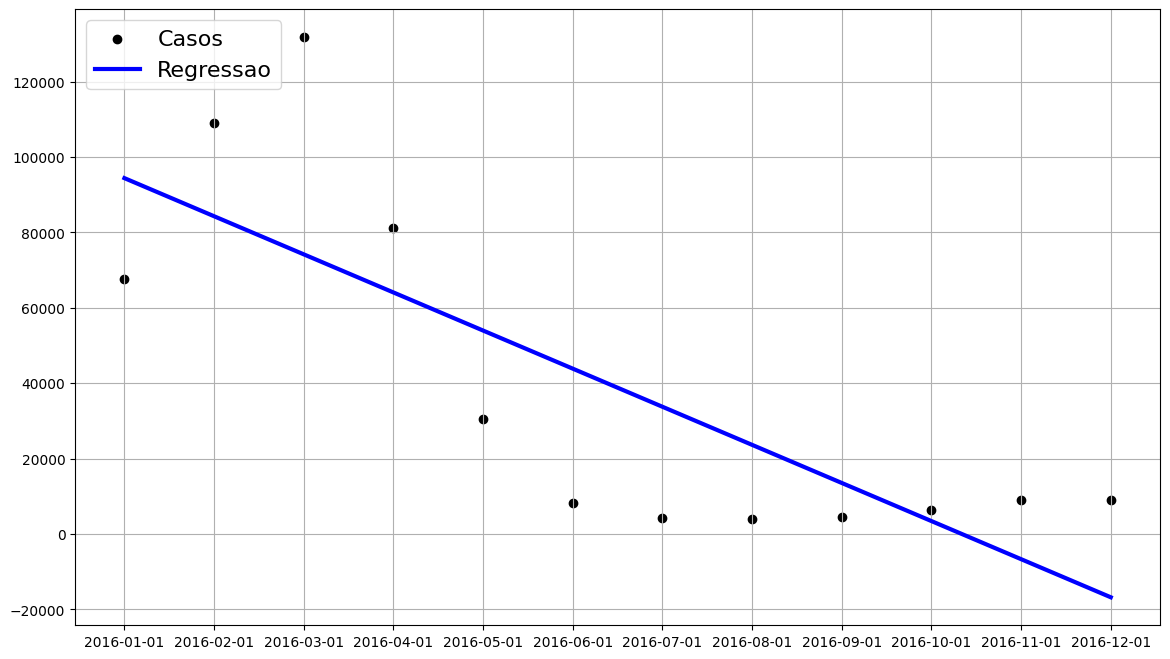

### 2017

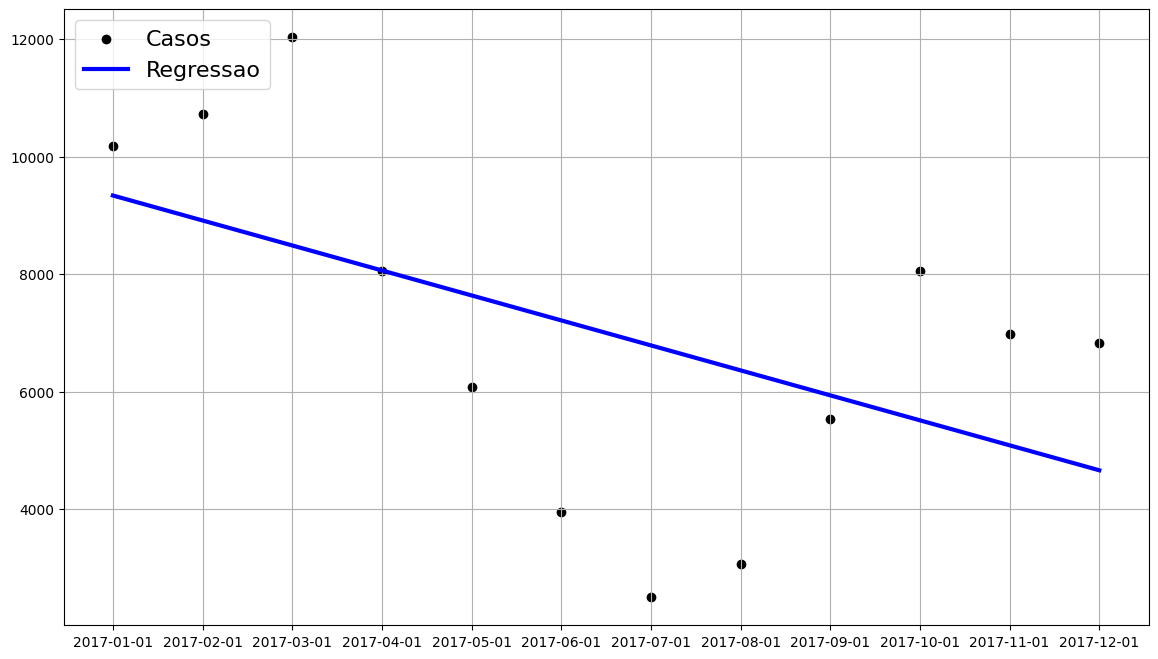

### 2018

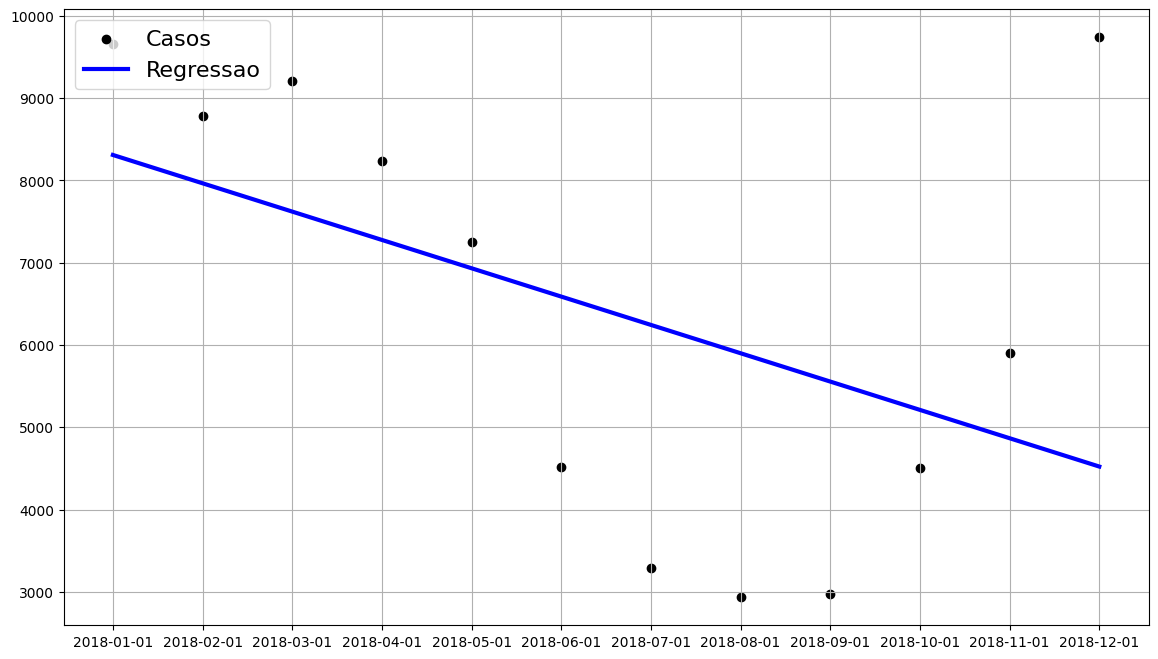

### 2019

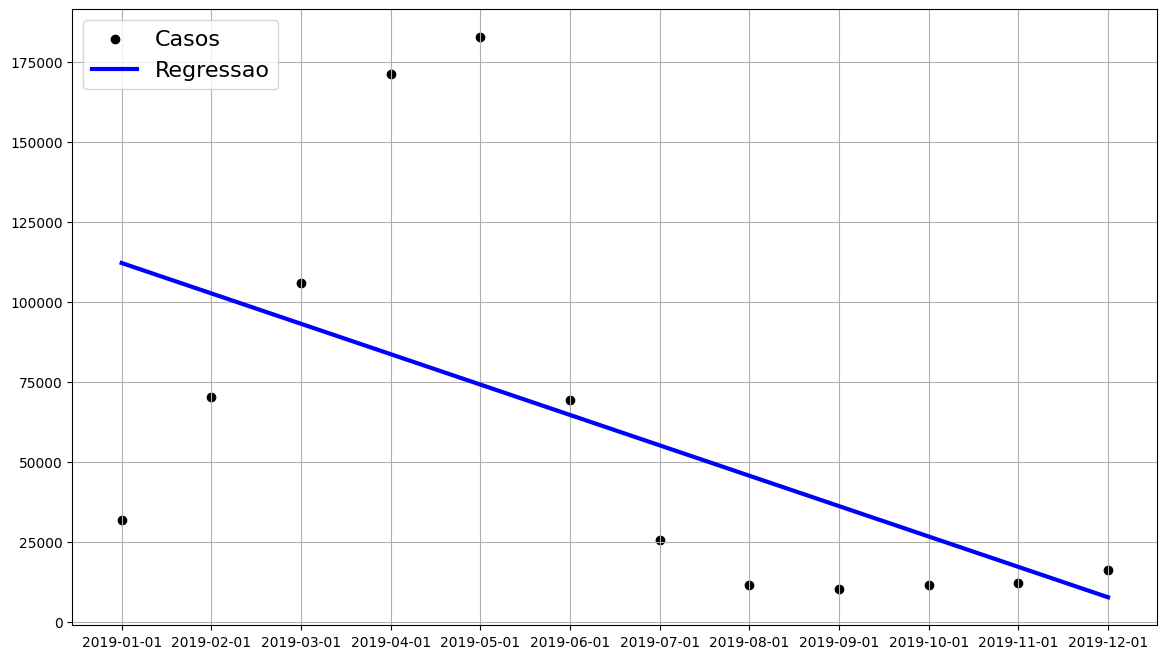

### 2020

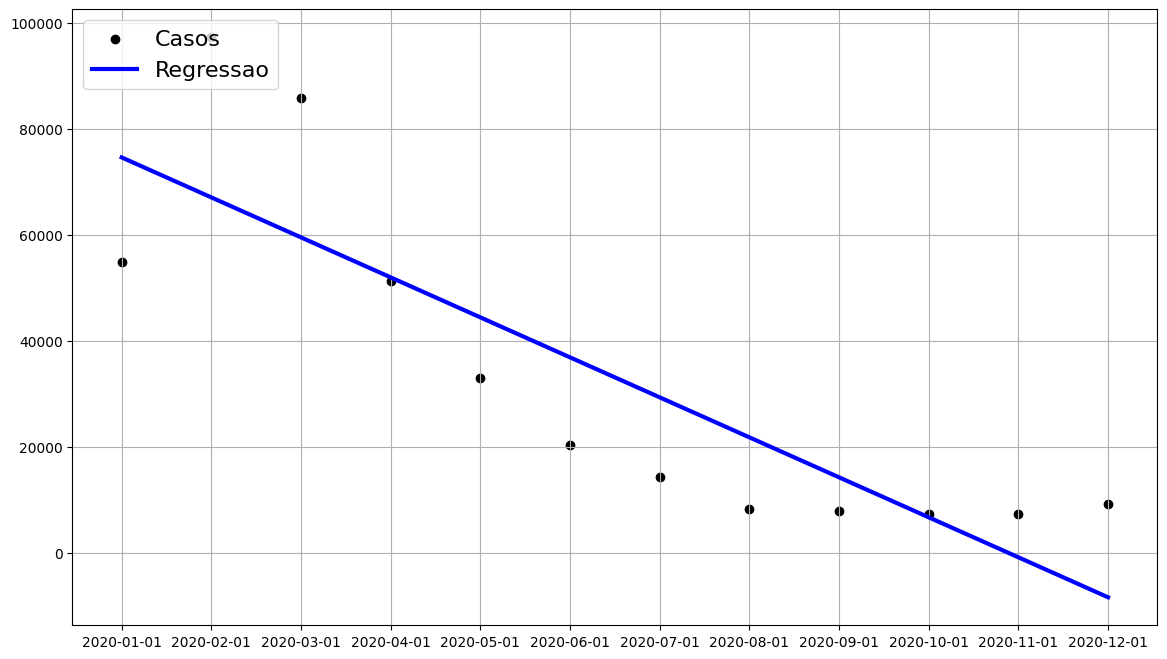

### 2021

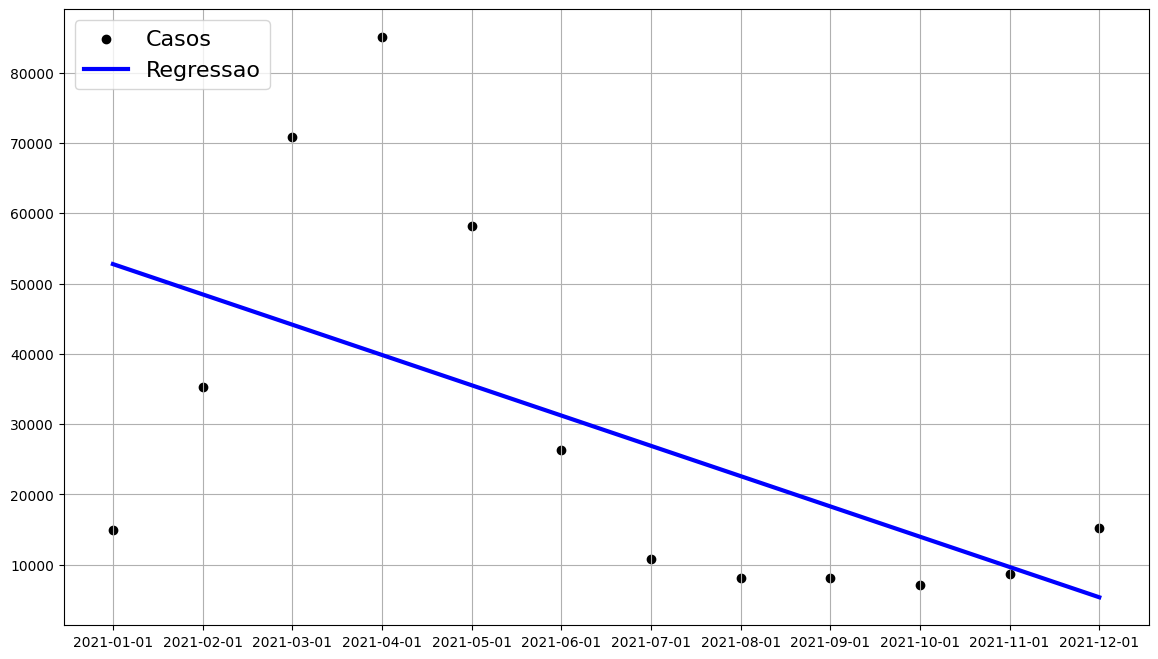

### 2022

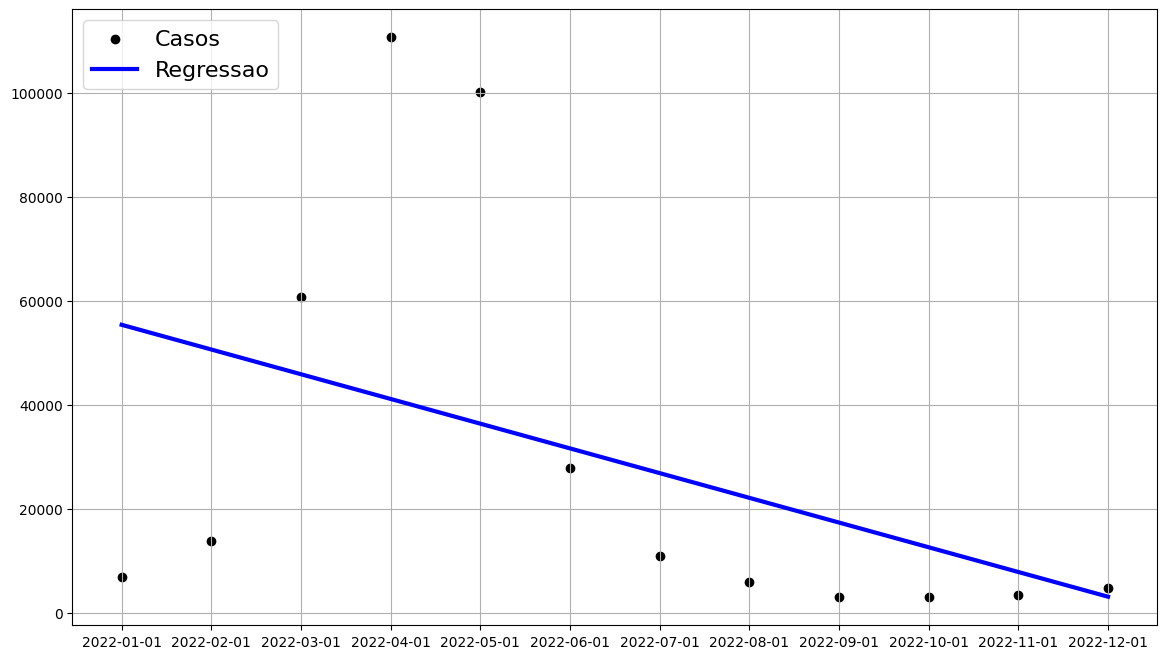

### 2023

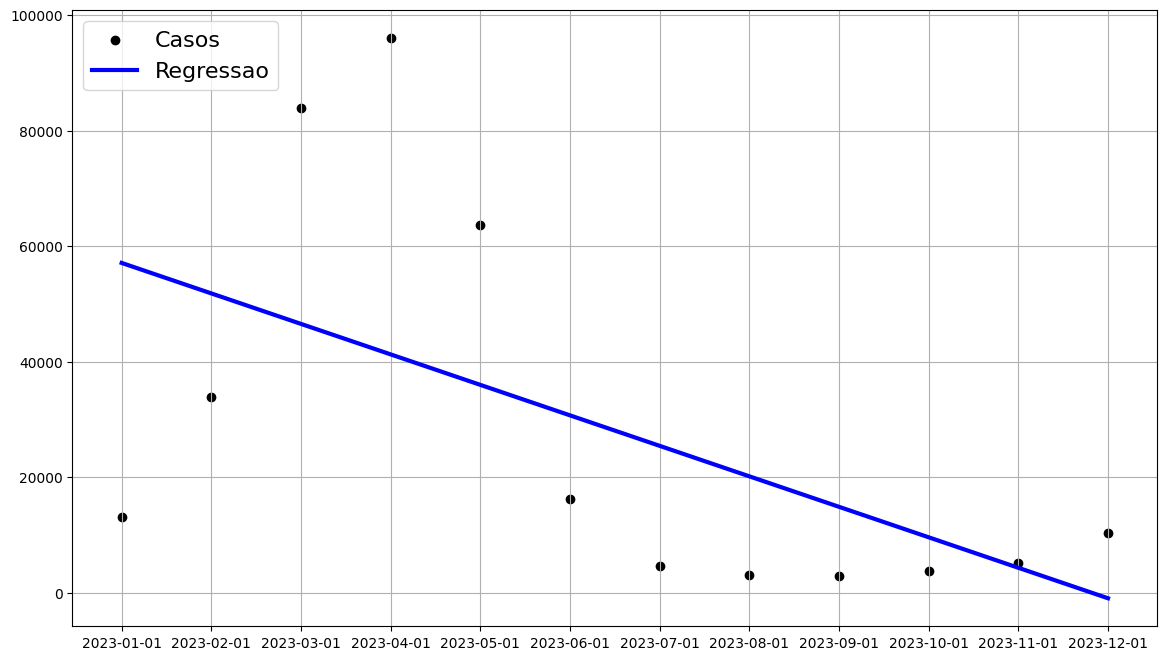

### 2024

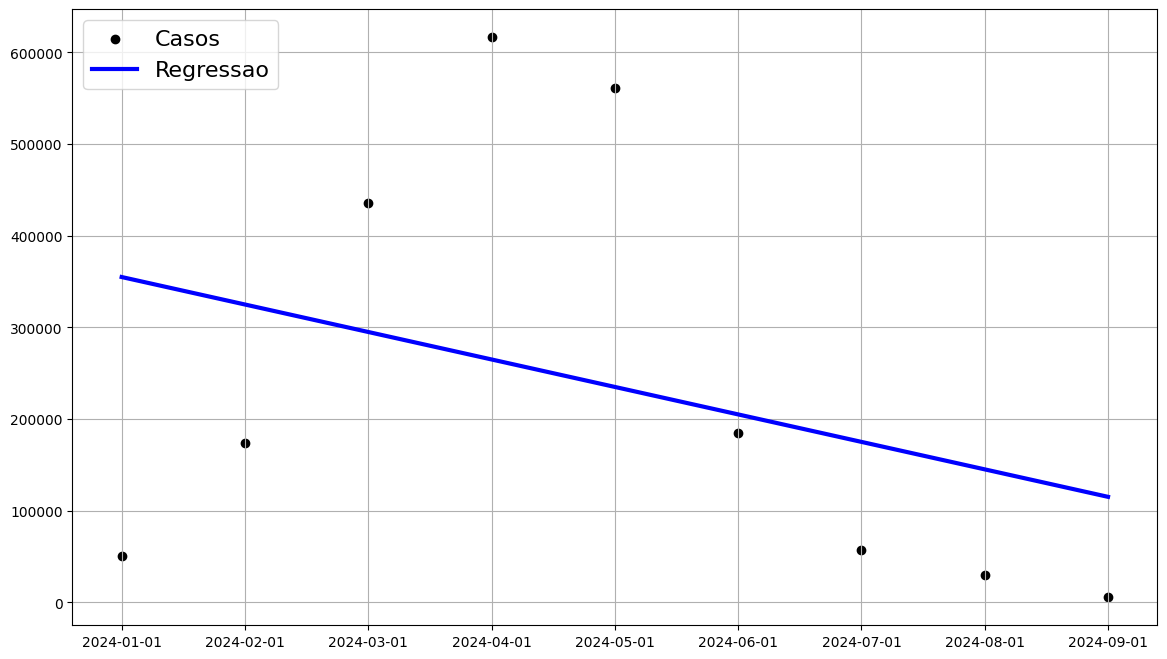

### TOTAL

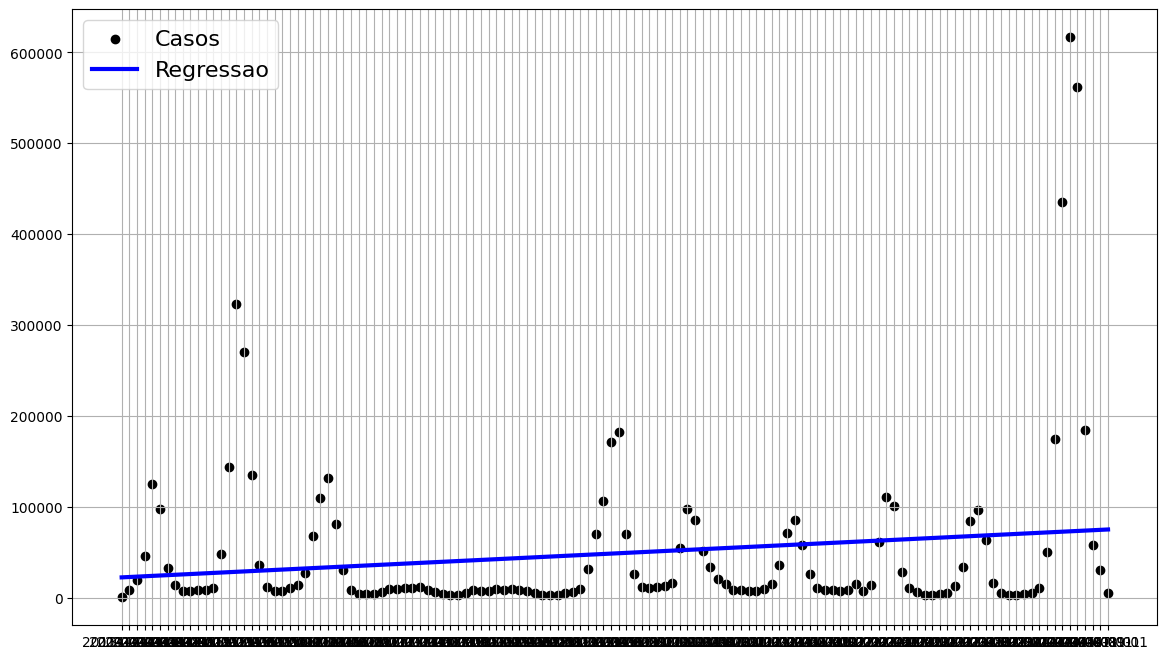

In [66]:
for ano in anos:

    data = dados_ano[ano]

    data['Time'] = np.arange(len(data.index))

    x = data.loc[:, ['Time']]
    y = data.loc[:, 'casos']

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    plt.figure(figsize=(14, 8), dpi=100)

    plt.scatter(data['dt_notificacao'], y, color='black')
    plt.plot(data['dt_notificacao'], regr.predict(x), color='blue', linewidth=3)

    plt.grid(True)

    plt.legend(['Casos', 'Regressao'], loc=2, prop={'size': 16})

    display_markdown(f'### {ano}', raw=True)
    
    plt.show()